# Final Project 1

Developed by :
- Kevin Anggara Putra
- Daniel Leksono
- Ines Savitri

## Data Overview: 
[Reference : Uber and Lyft Dataset Boston, MA]

- id : Unique identifier for each column
- timestamp : Unix timestamp
- hour : Hour of the day
- day : Day of the week
- month : Month in a year
- datetime : Date value
- timezone : Timezone
- source : Initial source of the ride
- destination : Destination of the ride
- cab_type : The type of cab
- price : Price of the ride
- distance : Total distance of the requested ride
- surge_multiplier : Times of the normal price
- temperature : Temperature of the ride
- apparentTemperature : Apparent temperatur of the ride
- summary : Weather report summary of the day
- humidity : Humidity of the ride
- windSpeed : Wind speed of the ride
- windGust : Wind gust of the ride
- uvIndex : UV index of the ride

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Download Datasets
df = pd.read_csv('rideshare_kaggle.csv')

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Data Preprocessing

- Dealing with missing value
- Explore the data visualization
- Data scaling

#### Fill Missing Value

In [70]:
# Fill Missing Values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [71]:
# Fill NULL values
df['price'].fillna(df['price'].median(), inplace=True)
df['price']

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068    13.5
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [72]:
# Check NULL values
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [73]:
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

id Unique Value
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
----------------------------------------------------------------------------------------------------
timestamp Unique Value
[1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]
----------------------------------------------------------------------------------------------------
hour Unique Value
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
----------------------------------------------------------------------------------------------------
day Unique Value
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
----------------------------------------------------------------------------------------------------
month Unique Value
[12 11]
--------------------------

[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']
----------------------------------------------------------------------------------------------------
long_summary Unique Value
[' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning. ' ' Partly cloudy throughout the day. '
 ' Mostly cloudy throughout the day. '
 ' Light rain in the morning and overnight. '
 ' Light rain until evening. ' ' Foggy in the morning. '
 ' Overcast throughout the day. ' ' Possible drizzle in the morning. '
 ' Rain in the morning and afternoon. ']
----------------------------------------------------------------------------------------------------
precipIntensity Unique Value
[0.     0.1299 0.0246 0.0624 0.0567 0.0036 0.007  0.1088 0.0341 0.0308
 0.0094 0.0013 0.0053 0.002  0.1264 0.0216 0.005  0.008  0.0288 0.0488
 0.0074 0.0017 0.0023 0.0274 0.0015 0.0031 0.0923 0.092  0.018

[0.72 1.   0.03 0.   0.44 0.12 0.64 0.91 0.53 0.06 0.81 0.77 0.02 0.92
 0.34 0.39 0.86 0.37 0.35 0.3  0.48 0.23 0.99 0.46 0.2  0.87 0.82 0.01
 0.98 0.74 0.13 0.41 0.76 0.08 0.89 0.22 0.78 0.25 0.56 0.95 0.52 0.75
 0.24 0.33 0.04 0.67 0.66 0.42 0.14 0.31 0.54 0.93 0.97 0.59 0.17 0.69
 0.55 0.28 0.83 0.4  0.6  0.96 0.8  0.49 0.21 0.68 0.09 0.94 0.32 0.71
 0.16 0.58 0.29 0.51 0.43 0.27 0.19 0.79 0.61 0.1  0.05 0.73 0.47]
----------------------------------------------------------------------------------------------------
uvIndex Unique Value
[0 1 2]
----------------------------------------------------------------------------------------------------
visibility.1 Unique Value
[10.     4.786  8.325  4.675  3.052  1.413  2.686  9.92   9.833  9.831
  9.959  4.054  9.796  9.91   9.901  9.969  9.608  6.397  9.808  3.231
  9.775  9.854  7.79   4.503  1.588  9.874  4.421  9.966  9.908  6.572
  9.772  9.668  9.856  9.899  9.707  9.712  6.121  9.689  3.188  3.475
  4.73   5.235  9.956  9.67   9.972  

#### Explore Data

In [74]:
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [75]:
# Prepare Dataset
#Select column yang dibutuhkan
data = df[['day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'price', 'distance','surge_multiplier']]
data.head(10)

,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
5,17,12,2018-12-17 18:25:12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0
6,26,11,2018-11-26 05:03:00,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0
7,2,12,2018-12-02 19:53:04,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0
8,3,12,2018-12-03 06:28:02,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0
9,27,11,2018-11-27 10:45:22,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0


In [76]:
#Menambahkan year, month, date, lalu yang diambil dari kolom 'datetime' menghapus kolom 'datetime'

data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
data.drop('datetime',inplace=True, axis=1)

In [77]:
data.head(10)

,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,year
0,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,2018
1,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,2018
2,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,2018
3,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,2018
4,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,2018
5,17,12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0,2018
6,26,11,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0,2018
7,2,12,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0,2018
8,3,12,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0,2018
9,27,11,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0,2018


In [78]:
# Move column 'price' to first column in the dataframe.
#data1 = data[[0,1,9,2,3,4,5,6,7,8]]
#data1

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   day               693071 non-null  int64  
 1   month             693071 non-null  int64  
 2   source            693071 non-null  object 
 3   destination       693071 non-null  object 
 4   cab_type          693071 non-null  object 
 5   name              693071 non-null  object 
 6   price             693071 non-null  float64
 7   distance          693071 non-null  float64
 8   surge_multiplier  693071 non-null  float64
 9   year              693071 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 52.9+ MB


In [80]:
data['price'].describe()

count    693071.000000
mean         16.303056
std           8.983913
min           2.500000
25%           9.500000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [81]:
data['distance'].describe()

count    693071.000000
mean          2.189430
std           1.138937
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: distance, dtype: float64

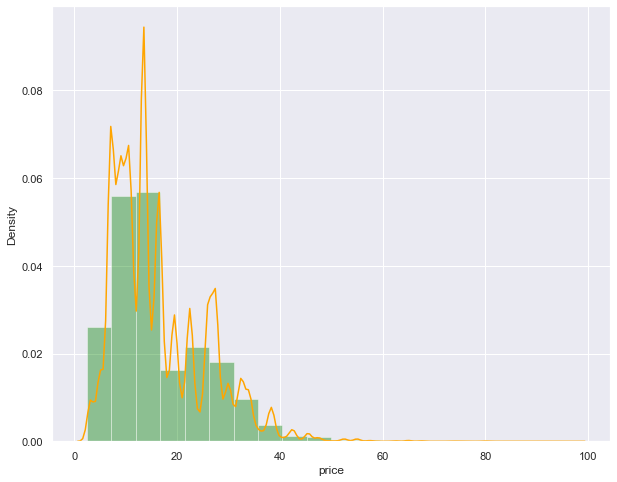

In [82]:
# Show the distribution of price
plt.figure(figsize=(10, 8))
sns.distplot(df['price'], color='green', bins=20, hist_kws={'alpha': 0.4}, kde_kws={"color": "orange"})
plt.show()

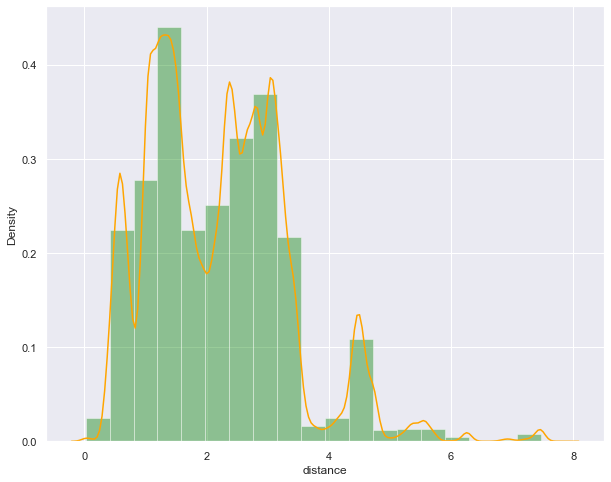

In [83]:
# Show the distribution of distance
plt.figure(figsize=(10, 8))
sns.distplot(df['distance'], color='green', bins=20, hist_kws={'alpha': 0.4}, kde_kws={"color": "orange"})
plt.show()

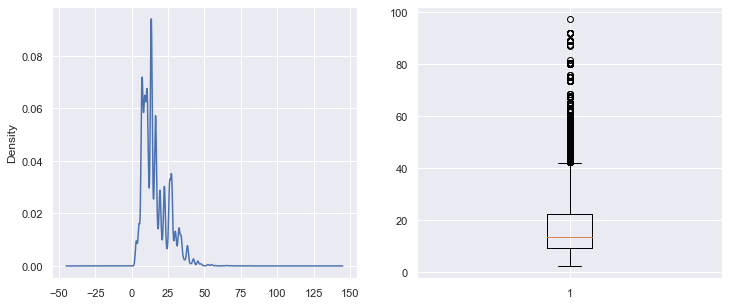

In [84]:
# Univariate analysis price

f = plt.figure(figsize=(12, 5))

f.add_subplot(1,2,1)
data['price'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data['price'])
plt.show()

Text(0.5, 1.0, 'Distribusi PRICE')

<Figure size 720x360 with 0 Axes>

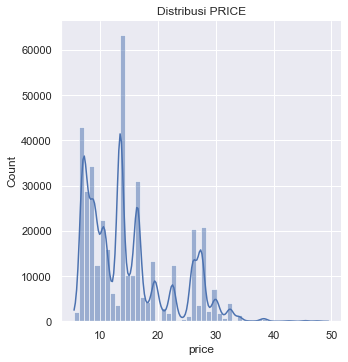

In [89]:
# Distribusi Price
data = data[(data['price']>5.0) & (data['price']<=50.0)]
plt.figure(figsize=(10,5))
sns.displot(data['price'], kde=True, bins=50)
plt.title('Distribusi PRICE')

In [86]:
# Berdasarkan output yang 

In [96]:
data['price'].mean()

15.006621427913213

In [94]:
data['price'].median()

13.5

In [95]:
data['price'].mode()

0    13.5
Name: price, dtype: float64

In [91]:
# Ukuran Persebaran Data
import scipy.stats
print('Range: ', np.ptp(data['price']))
print('Variance: ', np.var(data['price']))
print('Standar Deviation: ', np.std(data['price']))
print('Skewness: ', scipy.stats.skew(data['price']))

Range:  44.0
Variance:  52.72545116875251
Standar Deviation:  7.261229315257335
Skewness:  0.9322853217862407


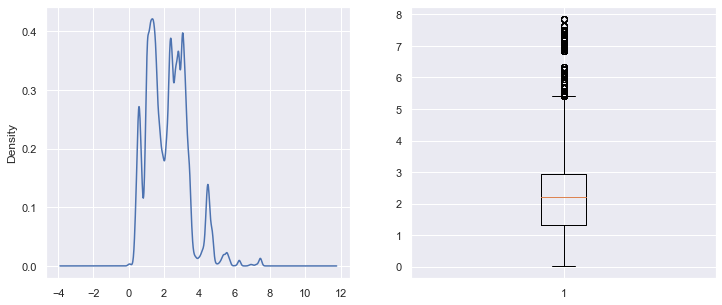

In [87]:
# Univariate analysis distance

a = plt.figure(figsize=(12, 5))

a.add_subplot(1,2,1)
data['distance'].plot(kind='kde')
a.add_subplot(1,2,2)
plt.boxplot(data['distance'])
plt.show()

Text(0.5, 1.0, 'Distribusi distance')

<Figure size 720x360 with 0 Axes>

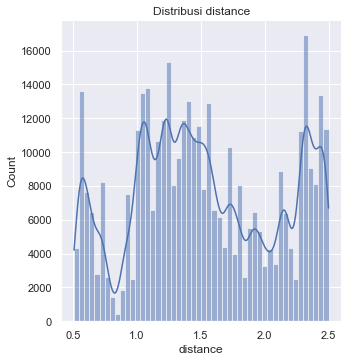

In [88]:
# Distribusi Distance
data = data[(data['distance']>0.50) & (data['distance']<=2.50)]
plt.figure(figsize=(10,5))
sns.displot(data['distance'], kde=True, bins=50)
plt.title('Distribusi distance')

In [97]:
data['distance'].mean()

1.535857121647402

In [98]:
data['distance'].median()

1.46

In [99]:
data['distance'].mode()

0    2.32
Name: distance, dtype: float64

In [100]:
# Ukuran Persebaran Data
import scipy.stats
print('Range: ', np.ptp(data['distance']))
print('Variance: ', np.var(data['distance']))
print('Standar Deviation: ', np.std(data['distance']))
print('Skewness: ', scipy.stats.skew(data['distance']))

Range:  1.99
Variance:  0.3230594097616228
Standar Deviation:  0.5683831540093556
Skewness:  0.09307825718307021


In [102]:
# Confidence Interval Rata-Rata harga
from scipy.stats import t
x = data['price']

mean = x.mean()
std = x.std()
dof = len(x)-1  #degree of freedom, yaitu penentuan nilai statistik ujinya

confidance = 0.95 # tingkat kepercayaan
t_test = np.abs(t.ppf((1-confidance)/2, dof))

values = np.round((mean-std*t_test/np.sqrt(len(x)), mean+std*t_test/np.sqrt(len(x))),2)

print(values)

[14.98 15.03]


##### Berdasarkan output di atas dapat diketahui bahwa rata-rata harga .. sebesar 14.98 sampai dengan 15.03 dengan tingkat kepercayaan 95%.

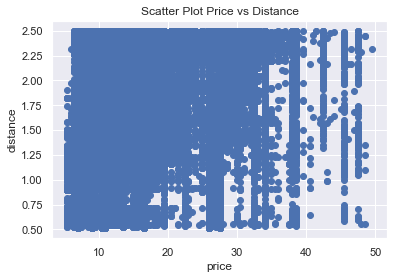

In [105]:
# Menggunakan scatter plot Price vs Distance
plt.scatter(data['price'], data['distance'])
plt.xlabel('price')
plt.ylabel('distance')
plt.title('Scatter Plot Price vs Distance')
plt.show()

In [110]:
data1 = df[['price', 'distance']]
data1

,price,distance
0,5.0,0.44
1,11.0,0.44
2,7.0,0.44
3,26.0,0.44
4,9.0,0.44
...,...,...
693066,13.0,1.00
693067,9.5,1.00
693068,13.5,1.00
693069,27.0,1.00


In [111]:
data1.corr()

,price,distance
price,1.000000,0.328601
distance,0.328601,1.000000


In [120]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# variabel x and y
x = df['distance'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [122]:
# make object linear regression
lin_reg = LinearRegression

In [123]:
# training the model from training data split
lin_reg.fit(x_train, y_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [124]:
# slope value/koefisien (m) and intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

AttributeError: type object 'LinearRegression' has no attribute 'coef_'